In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy import Class
from scipy import interpolate
import scipy
import scipy.special
import scipy.integrate

In [2]:
plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14

plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = "serif"
plt.rcParams['font.serif'] = "cm"
plt.rcParams['text.latex.preamble'] = "\usepackage{subdepth}, \usepackage{type1cm}"

In [3]:
#z_pk = [200.0,100.0,75.0,50.0,10.0,5.0,0.0]
z_pk = [100.0,10.0,5.0,3.0,1.0,0.5,0.0]
z_init = 100.
cosmo = Class()
cosmo.set({'output':'mPk dTk vTk lTk', 
           'z_pk':str(z_pk).strip('[]'),
           'a_init_nbody': 1./(z_init+1.),
           'switch_radiation_source':1,
                  'switch_dr_source':1,
           'switch_gamma':1,
           'radiation_streaming_approximation':3,
           'ur_fluid_approximation':3,
           'l_max_g':200,
           'l_max_ur':200,
           'l_max_pol_g':200, 
           'reio_parametrization':'reio_none',
           'k_per_decade_for_pk':100,
           'k_per_decade_for_bao':200,
           'gauge' : 'Newtonian',
           'P_k_max_1/Mpc' : 1.1,
           'evolver':0,
           'tol_perturb_integration':0.000001,
           'tol_background_integration':1e-8,
           'back_integration_stepsize':1e-3,
           'perturb_sampling_stepsize':0.01,
           'tol_thermo_integration':1e-5,
           'Omega_cdm':0.24*1+1e-6,
                  'start_sources_at_tau_c_over_tau_h':0.004,
                  'start_small_k_at_tau_c_over_tau_h':0.000015
            })
#for key, val in cosmo.pars.iteritems():
#    print key,' = ',val
cosmo.compute()

In [4]:
bg = cosmo.get_background()

grow_interp_z = interpolate.interp1d(bg['z'],bg['grow'])
decay_interp_z = interpolate.interp1d(bg['z'],bg['bwdec'])
rho_cdm_interp_z = interpolate.interp1d(bg['z'],bg['(.)rho_cdm'])
rho_b_interp_z = interpolate.interp1d(bg['z'],bg['(.)rho_b'])

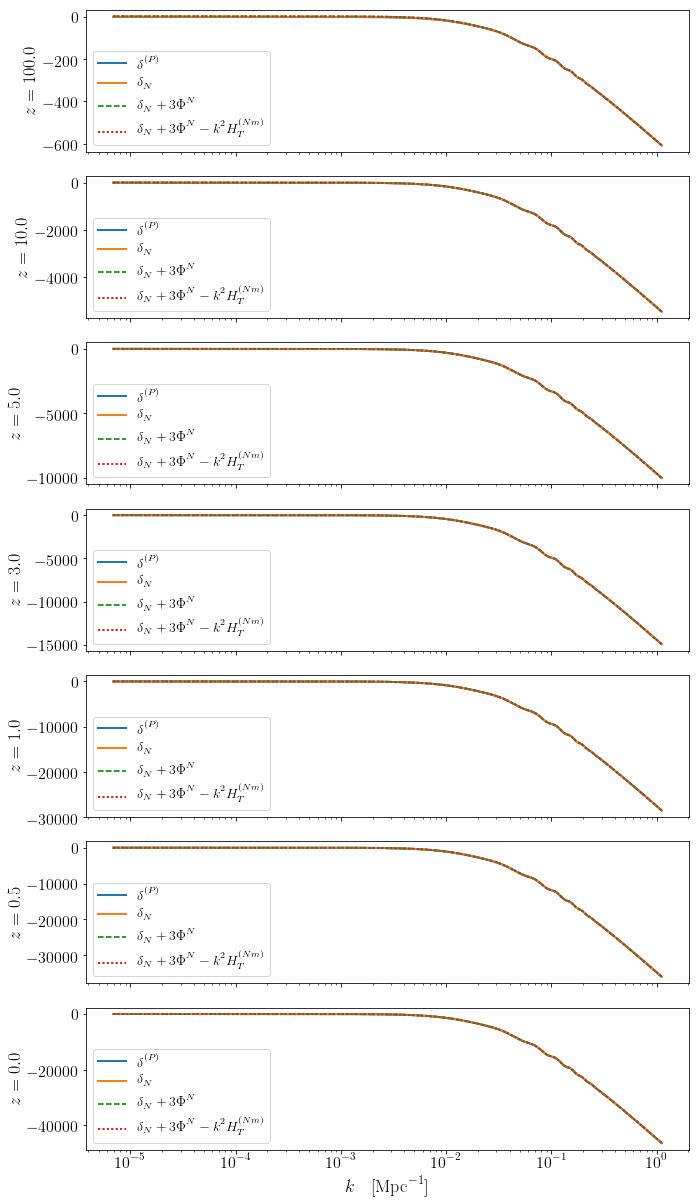

In [6]:
zvec = z_pk
f, axes = plt.subplots(len(zvec),1,figsize=(10,17),sharex=True)
tk0 = cosmo.get_transfer(0.)
CHT_grow0 = tk0['delta_Nb']
CHT_decay0 = tk0['theta_Nb']

for iz, z in enumerate(zvec):
    a = 1./(1.+z)
    tk = cosmo.get_transfer(z)
    k = tk['k (h/Mpc)']*cosmo.h()
    CHT_grow = tk['delta_Nb']
    CHT_decay = tk['theta_Nb']
    H_T_nb = tk['L_prime']
    L = tk['L']
    H_T_nm = H_T_nb - k*L
    H_T_bs = H_T_nb + (CHT_grow-CHT_grow0)*grow_interp_z(z)+(CHT_decay - CHT_decay0)*decay_interp_z(z)
 
    delta_N = tk['delta_N']
    rho_cdm = rho_cdm_interp_z(z)
    rho_b = rho_b_interp_z(z)
    Phi_N = -3./(2.*k**2)*a*a*(rho_cdm+rho_b)*delta_N
    
    delta_P = (rho_cdm*tk['d_cdm']+rho_b*tk['d_b'])/(rho_cdm+rho_b)
    
    axes[iz].semilogx(k,delta_P,label=r'$\delta^{(P)}$')
    axes[iz].semilogx(k,delta_N,label=r'$\delta_N$')
    axes[iz].semilogx(k,delta_N+3*Phi_N,label=r'$\delta_N + 3\Phi^N$',ls='--')
    axes[iz].semilogx(k,delta_N+3*Phi_N-k*k*H_T_nm,label=r'$\delta_N + 3\Phi^N -k^2 H_T^{(Nm)}$',ls=':')
    
    axes[iz].legend(loc='lower left')
    axes[iz].set_ylabel(r'$z='+str(z)+'$')

axes[-1].set_xlabel(r'$k\quad[\mathrm{Mpc}^{-1}]$')
f.tight_layout()
f.savefig('delta_question.pdf')
#lgd = axes[1].legend(fontsize=fs,loc='upper center',ncol=len(zvec),
#                bbox_to_anchor=(0.5, 1.6), handletextpad=0.1)

#        axes[0].set_ylim([-4,1])
#f.subplots_adjust(wspace=0.5)

#f.savefig('H_T_influence.pdf',bbox_extra_artists=(lgd,), bbox_inches='tight')

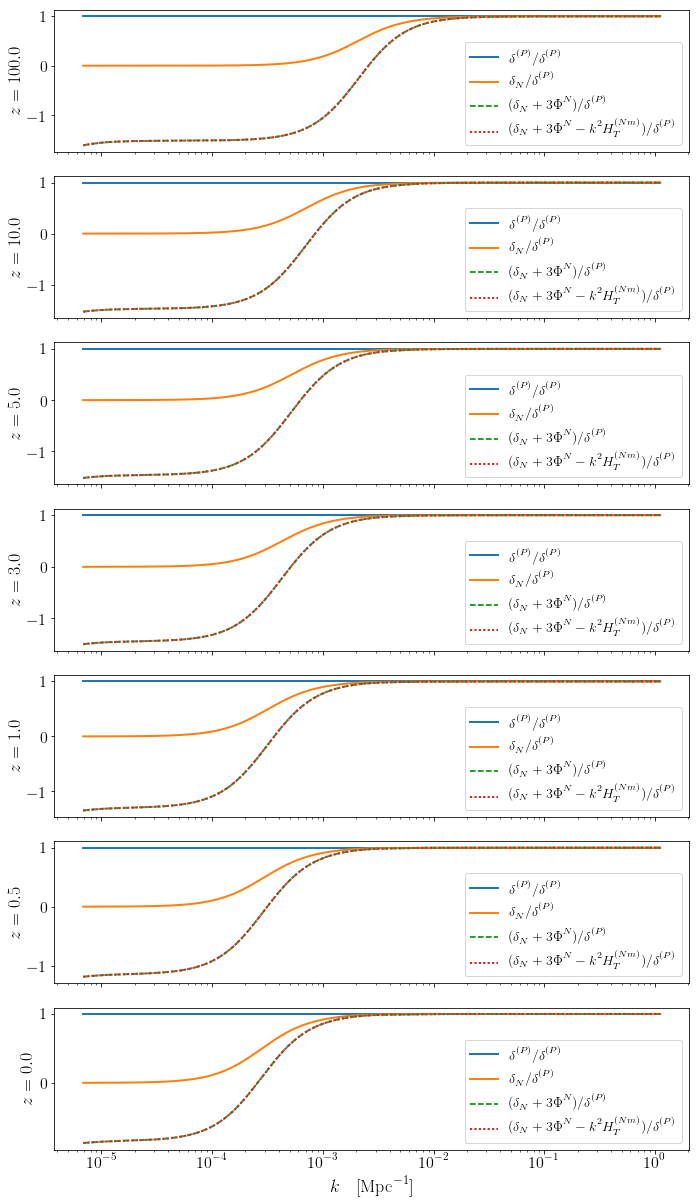

In [7]:
zvec = z_pk
f, axes = plt.subplots(len(zvec),1,figsize=(10,17),sharex=True)
tk0 = cosmo.get_transfer(0.)
CHT_grow0 = tk0['delta_Nb']
CHT_decay0 = tk0['theta_Nb']

for iz, z in enumerate(zvec):
    a = 1./(1.+z)
    tk = cosmo.get_transfer(z)
    k = tk['k (h/Mpc)']*cosmo.h()
    CHT_grow = tk['delta_Nb']
    CHT_decay = tk['theta_Nb']
    H_T_nb = tk['L_prime']
    L = tk['L']
    H_T_nm = H_T_nb - k*L
    H_T_bs = H_T_nb + (CHT_grow-CHT_grow0)*grow_interp_z(z)+(CHT_decay - CHT_decay0)*decay_interp_z(z)
 
    delta_N = tk['delta_N']
    rho_cdm = rho_cdm_interp_z(z)
    rho_b = rho_b_interp_z(z)
    Phi_N = -3./(2.*k**2)*a*a*(rho_cdm+rho_b)*delta_N
    
    delta_P = (rho_cdm*tk['d_cdm']+rho_b*tk['d_b'])/(rho_cdm+rho_b)
    
    axes[iz].semilogx(k,delta_P/delta_P,label=r'$\delta^{(P)}/\delta^{(P)}$')
    axes[iz].semilogx(k,delta_N/delta_P,label=r'$\delta_N/\delta^{(P)}$')
    axes[iz].semilogx(k,(delta_N+3*Phi_N)/delta_P,label=r'$(\delta_N + 3\Phi^N)/\delta^{(P)}$',ls='--')
    axes[iz].semilogx(k,(delta_N+3*Phi_N-k*k*H_T_nm)/delta_P,label=r'$(\delta_N + 3\Phi^N -k^2 H_T^{(Nm)})/\delta^{(P)}$',ls=':')
    
    axes[iz].legend(loc='lower right')
    axes[iz].set_ylabel(r'$z='+str(z)+'$')

axes[-1].set_xlabel(r'$k\quad[\mathrm{Mpc}^{-1}]$')
f.tight_layout()
f.savefig('delta_question_ratio.pdf')

In [ ]:
print tk.keys()